In [1]:
%pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install gdown

Note: you may need to restart the kernel to use updated packages.


Descargando dataset desde Google Drive...


Downloading...
From: https://drive.google.com/uc?id=1E1b_xYvTw5fX5Brq5vRe7TEIoC09UrfQ
To: /workspaces/pad_final_Jazmin_Irene_Ortiz_G/src/pad20251/obesity_dataset/ObesityDataSet.csv
100%|██████████| 264k/264k [00:00<00:00, 8.52MB/s]


Descarga completa.
Dataset cargado con éxito.
Vista previa del dataset:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   
5    Male  29.0    1.62    53.0                             no  yes   2.0   
6  Female  23.0    1.50    55.0                            yes  yes   3.0   
7    Male  22.0    1.64    53.0                             no   no   2.0   
8    Male  24.0    1.78    64.0                            yes  yes   3.0   
9    Male  22.0    1.72    68.0                            yes  yes   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes   

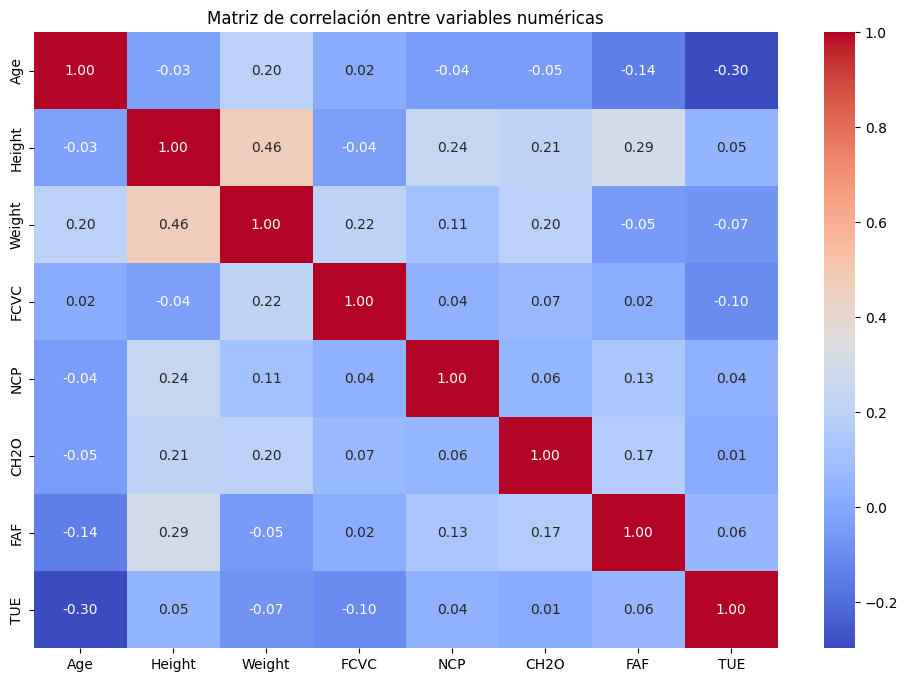

Proceso completado. Dataset limpio exportado como 'Obesity_Cleaned.csv'


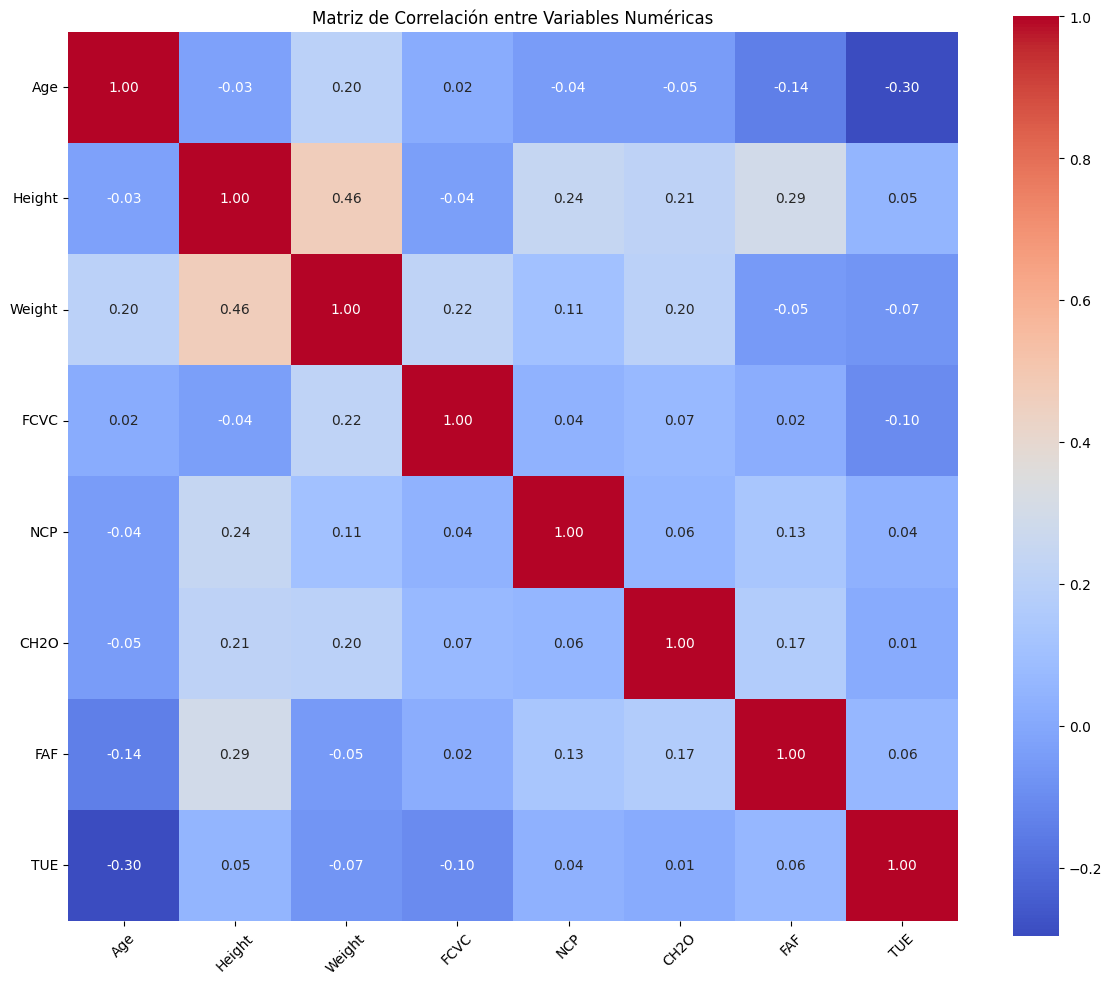

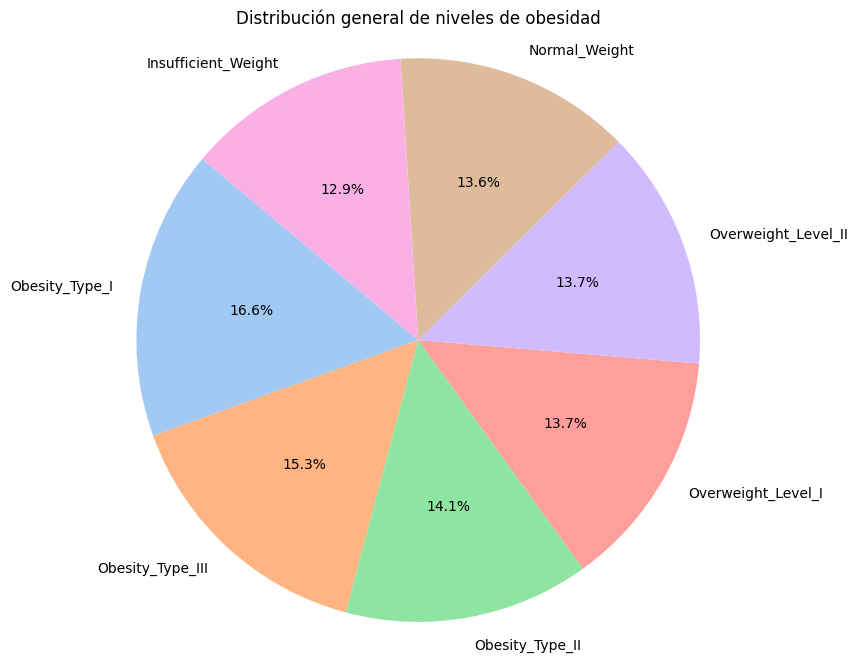

Frecuencia por nivel de obesidad:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


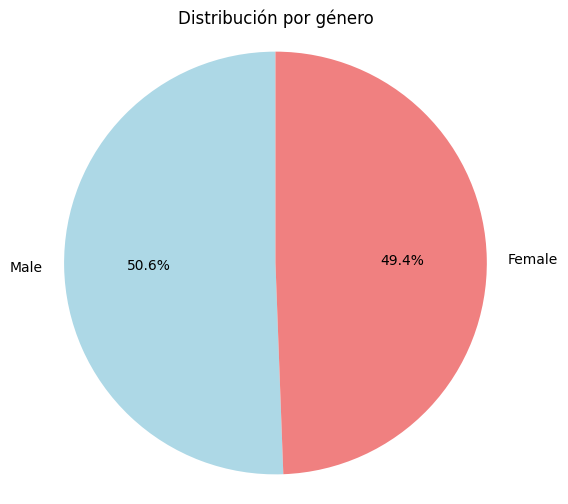

Frecuencia por género:
Gender
Male      1068
Female    1043
Name: count, dtype: int64
Distribución cruzada entre Género y Nivel de Obesidad:
NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Gender                                                           
Female                      173            141             156   
Male                         99            146             195   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Gender                                                              
Female                    2               323                 145   
Male                    295                 1                 145   

NObeyesdad  Overweight_Level_II  
Gender                           
Female                      103  
Male                        187  


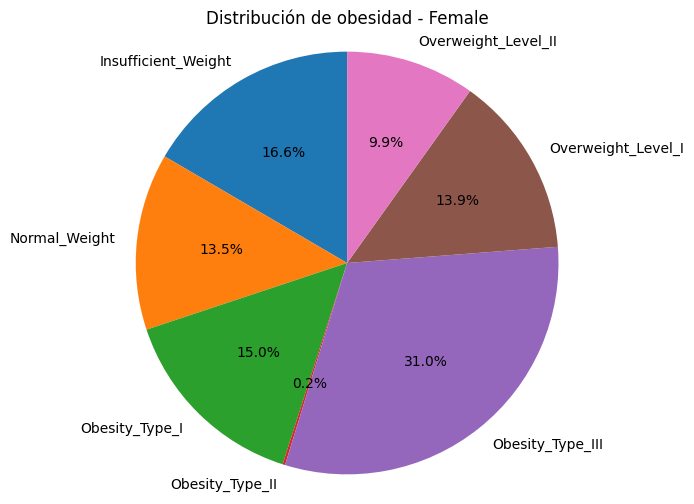

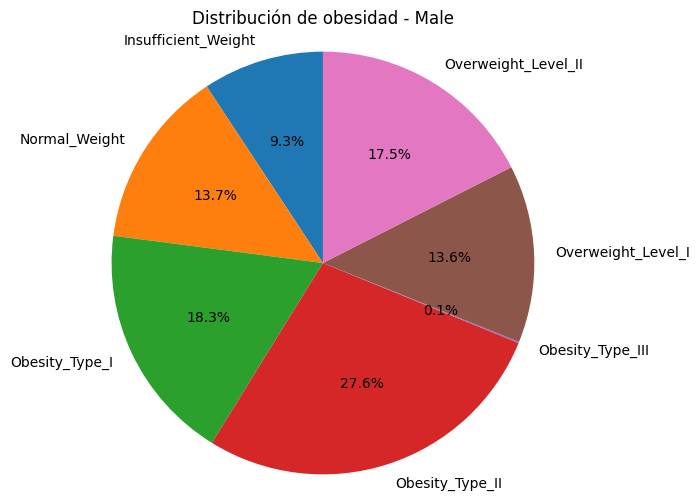

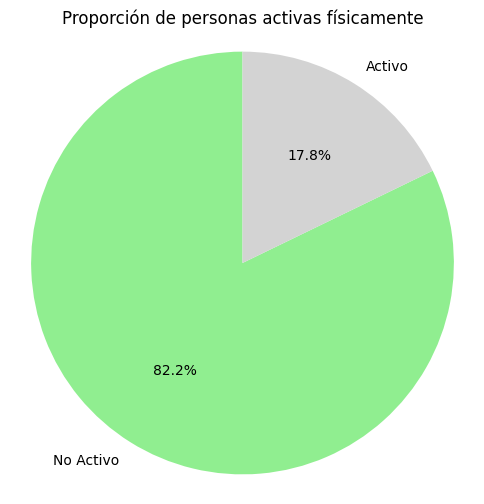

Frecuencia de actividad física:
Es_activo
No Activo    1735
Activo        376
Name: count, dtype: int64


In [3]:
# Proyecto Integrador - Análisis del Dataset de Obesidad

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import gdown

# URL de descarga directa de Google Drive
file_id = "1E1b_xYvTw5fX5Brq5vRe7TEIoC09UrfQ"
download_url = f"https://drive.google.com/uc?id={file_id}"

dataset_dir = "./obesity_dataset"
dataset_path = os.path.join(dataset_dir, "ObesityDataSet.csv")

# Crear el directorio si no existe
os.makedirs(dataset_dir, exist_ok=True)

# Descargar el archivo si no existe
if not os.path.exists(dataset_path):
    print("Descargando dataset desde Google Drive...")
    try:
        gdown.download(download_url, dataset_path, quiet=False)
        print("Descarga completa.")
    except Exception as e:
        print(f"ERROR: Ocurrió un problema al descargar el archivo. {e}")

# Cargar dataset
df = None
if os.path.exists(dataset_path):
    try:
        df = pd.read_csv(dataset_path, encoding='utf-8', sep=",")
        df.columns = df.columns.str.strip()  # Eliminar espacios en nombres de columnas
        print("Dataset cargado con éxito.")
    except Exception as e:
        print(f"ERROR: No se pudo cargar el dataset. {e}")
else:
    print("ERROR: No se encontró el archivo CSV. Verifica la descarga.")

if df is not None:
    # 2. Exploración de datos
    print("Vista previa del dataset:")
    print(df.head(10))
    print(f"\nEl dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")
    print("\nColumnas disponibles exactamente como están:")
    for col in df.columns:
        print(f"- '{col}'")

    print("\nInformación general:")
    print(df.info())
    print("\nEstadísticas descriptivas:")
    print(df.describe(include='all'))

    # 3. Limpieza de datos
    print("\nValores nulos por columna:")
    print(df.isnull().sum())

    # Eliminar filas con valores nulos
    df.dropna(inplace=True)

    # 4. Conversión de tipos de datos
    # Convertir columnas categóricas a tipo 'category'
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        df[col] = df[col].astype('category')

    # 5. Visualización de datos
    # Distribución de la variable objetivo 'NObesity'
    if 'NObesity' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='NObesity', order=df['NObesity'].value_counts().index)
        plt.title("Distribución de los niveles de obesidad")
        plt.xlabel("Nivel de Obesidad")
        plt.ylabel("Frecuencia")
        plt.xticks(rotation=45)
        plt.show()

    # Matriz de correlación entre variables numéricas
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Matriz de correlación entre variables numéricas")
    plt.show()

    # 6. Exportar el dataset limpio
    df.to_csv("Obesity_Cleaned.csv", index=False, encoding='utf-8')
    print("Proceso completado. Dataset limpio exportado como 'Obesity_Cleaned.csv'")

    # Matriz de correlación
    plt.figure(figsize=(12, 10))
    correlation_matrix = df.corr(numeric_only=True)

    # Mostrar como heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Matriz de Correlación entre Variables Numéricas")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # ¿Cómo se distribuyen los niveles de obesidad entre hombres y mujeres?

    obesity_counts = df['NObeyesdad'].value_counts()  # Tabla de frecuencias

    # Gráfico de torta
    plt.figure(figsize=(8, 8))
    plt.pie(obesity_counts, labels=obesity_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title("Distribución general de niveles de obesidad")
    plt.axis('equal')
    plt.show()

    # Mostrar tabla
    print("Frecuencia por nivel de obesidad:")
    print(obesity_counts)

    # ¿Cuál es la proporción de hombres y mujeres en el dataset?
    # Conteo por género
    gender_counts = df['Gender'].value_counts()

    # Gráfico de torta
    plt.figure(figsize=(6, 6))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
    plt.title("Distribución por género")
    plt.axis('equal')
    plt.show()

    # Mostrar tabla
    print("Frecuencia por género:")
    print(gender_counts)

    # ¿Cómo se distribuyen los niveles de obesidad dentro de cada género?
    # Tabla cruzada
    gender_obesity = pd.crosstab(df['Gender'], df['NObeyesdad'])

    # Mostrar tabla
    print("Distribución cruzada entre Género y Nivel de Obesidad:")
    print(gender_obesity)

    # Gráficos de torta por género
    for gender in gender_obesity.index:
        plt.figure(figsize=(6, 6))
        plt.pie(gender_obesity.loc[gender], labels=gender_obesity.columns, autopct='%1.1f%%', startangle=90)
        plt.title(f"Distribución de obesidad - {gender}")
        plt.axis('equal')
        plt.show()

   # ¿Qué proporción de personas realiza actividad física regularmente?

    # Definimos FAF >= 2 como "activa"
    df['Es_activo'] = df['FAF'].apply(lambda x: 'Activo' if x >= 2 else 'No Activo')
    actividad_counts = df['Es_activo'].value_counts()

    # Gráfico de torta
    plt.figure(figsize=(6, 6))
    plt.pie(actividad_counts, labels=actividad_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightgray'])
    plt.title("Proporción de personas activas físicamente")
    plt.axis('equal')
    plt.show()

    # Mostrar tabla
    print("Frecuencia de actividad física:")
    print(actividad_counts)